How do the shapes of the error-envelope change as 1 dimensionless quantity changes?

1. Have 1 basic configuration, reasonably high added mass and damping.
2. Pick 1 thing to vary, vary it, plot alpha, beta values.

In [1]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np

In [2]:
file1 = "data/predetermined-2.pkl"

big_nmk, nmk_max = 200, 150
heaving, NMK, rho = [0, 0, 1], [big_nmk] * 4, 1023

m0h_base = 20
radwidth2 = 0.5
hmdr_base = 25
left_ratio_base = 0.9
right_ratio_base = 1.3
rad_ratio_base = 0.2 # split evenly between regions inner and mid
# hmd0 = hmd1 /2

def solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 2):
  prob = ConvergenceProblemI(h, d, a, heaving, NMK, m0, rho)
  mk = prob.m_k
  info = {"h" : h,
          "d" : d,
          "a" : a,
          "region" : region,
          "m0s" : [m0]}
  print(info)
  return merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))

def generate_d_a(radwidth2, hmdr, left_ratio, right_ratio, rad_ratio, m0h):
  hmd2 = hmdr * radwidth2
  hmd1 = left_ratio * hmd2
  hmd0 = hmd1 / 2
  h = right_ratio * hmd2
  m0 = m0h / h
  radwidth1 = (radwidth2/rad_ratio)/2
  radwidth0 = radwidth1
  radwidths = [radwidth0, radwidth1, radwidth2]
  hmds = [hmd0, hmd1, hmd2]
  a = [sum(radwidths[0:i+1]) for i in range(3)]
  d = [h - hmd for hmd in hmds]
  for i in range(3):
    assert radwidths[i] > 0
    assert d[i] > 0
    assert hmds[i] >= radwidths[i] # This is for the chosen nmk_max.
  return h, d, a, m0

# all_prob_sets = []
# # base
# prob_set = []
# h, d, a, m0 = generate_d_a(radwidth2, hmdr_base, left_ratio_base, right_ratio_base, rad_ratio_base, m0h_base)
# prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max, region = 2))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished base.")

# # hmdr
# hmdrs = list(np.linspace(6, 30, 25))
# prob_set = []
# for hmdr in hmdrs:
#   h, d, a, m0 = generate_d_a(radwidth2, hmdr, left_ratio_base, right_ratio_base, rad_ratio_base, m0h_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished hmdrs.")

# # hmdr, but the left ratio > 1
# hmdrs = list(np.linspace(5, 30, 26))
# left_ratio_base_alt = 1.25
# prob_set = []
# for hmdr in hmdrs:
#   h, d, a, m0 = generate_d_a(radwidth2, hmdr, left_ratio_base_alt, right_ratio_base, rad_ratio_base, m0h_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished hmdrs, second set.")

# # left ratios
# right_ratio_base_alt = 2.5
# left_ratios = list(np.linspace(0.2, 0.9, 8)) + list(np.linspace(0.91, 1.09, 19)) + list(np.linspace(1.1, 2, 9))
# prob_set = []
# for left_ratio in left_ratios:
#   h, d, a, m0 = generate_d_a(radwidth2, hmdr_base, left_ratio, right_ratio_base_alt, rad_ratio_base, m0h_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished right ratios.")

# # right ratio
# right_ratios = list(np.linspace(1.05, 1.5, 10)) + list(np.linspace(1.6, 2.5, 10)) + list(np.linspace(3, 7, 5))
# prob_set = []
# for right_ratio in right_ratios:
#   h, d, a, m0 = generate_d_a(radwidth2, hmdr_base, left_ratio_base, right_ratio, rad_ratio_base, m0h_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished right ratios.")

# # rad ratio
# rad_ratios = list(np.linspace(0.05, 0.25, 21))
# prob_set = []
# for rad_ratio in rad_ratios:
#   h, d, a, m0 = generate_d_a(radwidth2, hmdr_base, left_ratio_base, right_ratio_base, rad_ratio, m0h_base)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished rad ratios.")

# # m0h
# m0hs = list(np.linspace(0.1, 0.9, 9)) + list(np.linspace(1, 9, 9)) + list(np.linspace(10, 30, 11))
# prob_set = []
# for m0h in m0hs:
#   h, d, a, m0 = generate_d_a(radwidth2, hmdr_base, left_ratio_base, right_ratio_base, rad_ratio_base, m0h)
#   prob_set.append(solve_and_store(h, d, a, heaving, NMK, m0, rho, nmk_max))
# all_prob_sets.append(prob_set)
# update_data_file(all_prob_sets, file1)
# print("Finished m0hs.")


In [3]:
all_prob_sets = open_pkl_file(file1)
for prob_set in all_prob_sets:
  generate_convergence_data(prob_set, [0.01, 0.005])
  generate_log_data(prob_set)

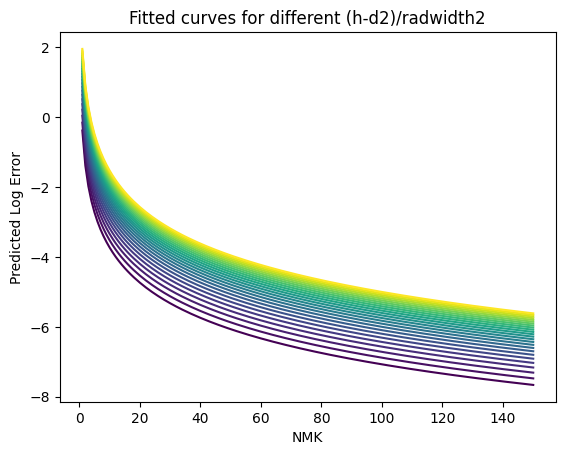

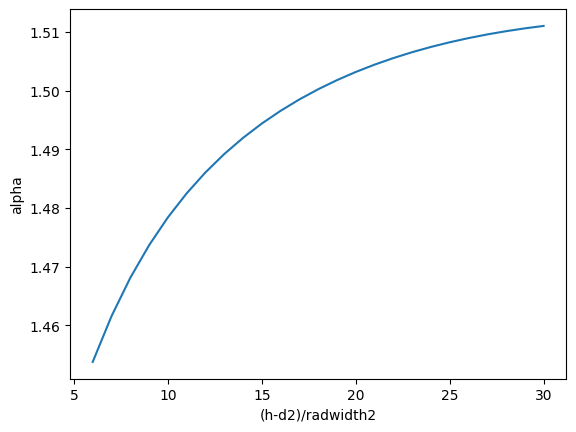

fitted slope: 0.00209, slope/avg: 0.0014


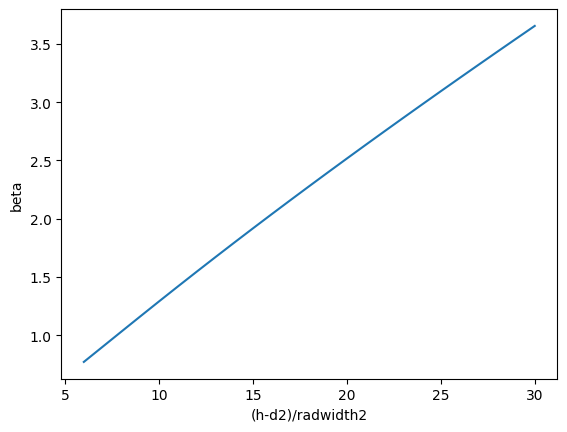

fitted slope: 0.12, slope/avg: 0.0532
Average covariance matrix:
 [[3.00419853e-05 1.21203996e-04]
 [1.21203996e-04 5.86652408e-04]]


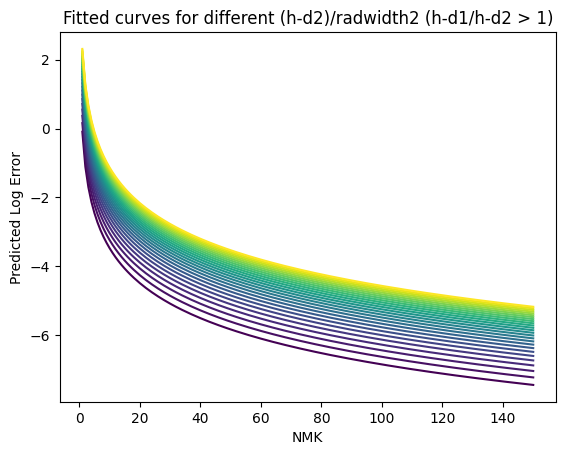

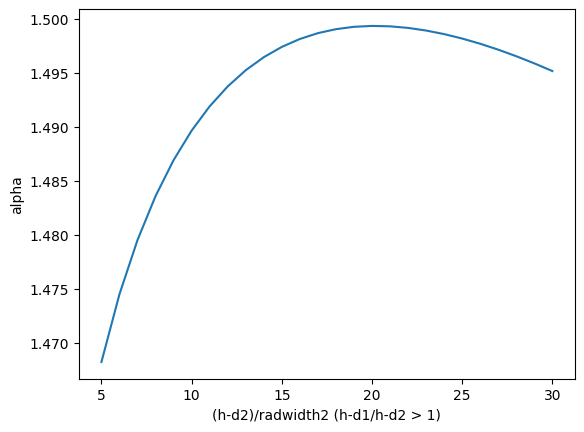

fitted slope: 0.000788, slope/avg: 0.000528


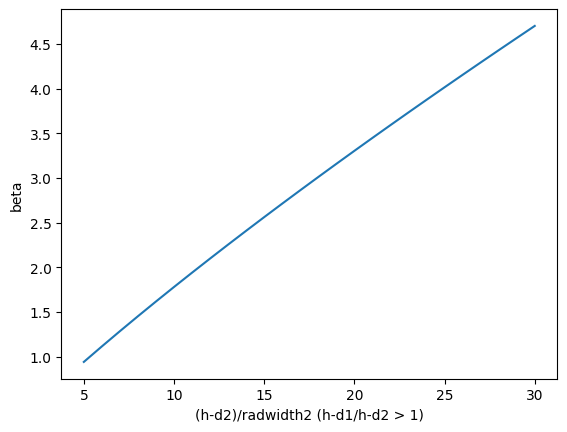

fitted slope: 0.15, slope/avg: 0.0517
Average covariance matrix:
 [[1.62655144e-05 8.54621598e-05]
 [8.54621598e-05 5.53554179e-04]]


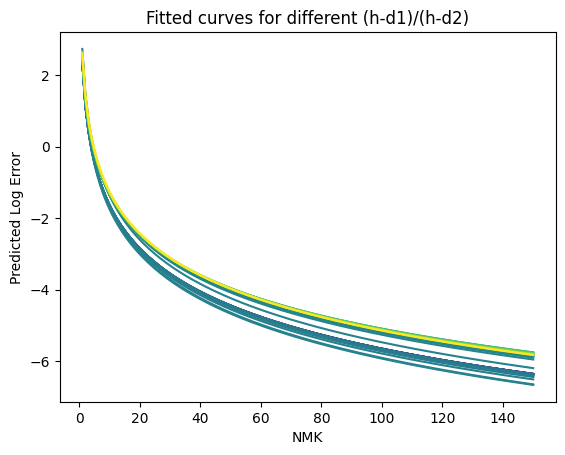

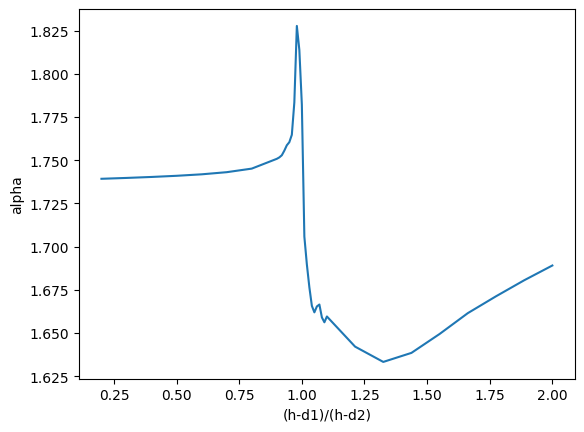

fitted slope: -0.0683, slope/avg: -0.0399


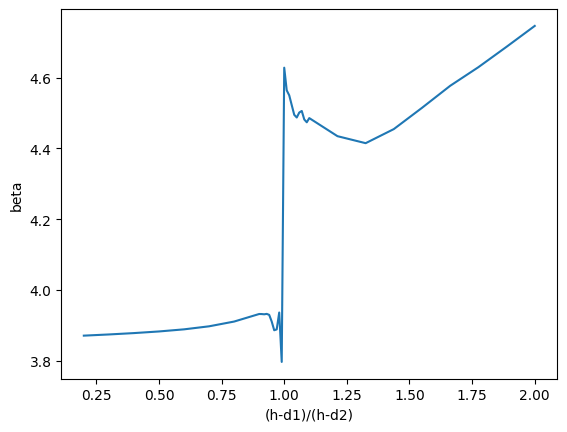

fitted slope: 0.606, slope/avg: 0.143
Average covariance matrix:
 [[0.00072341 0.0045561 ]
 [0.0045561  0.03264676]]


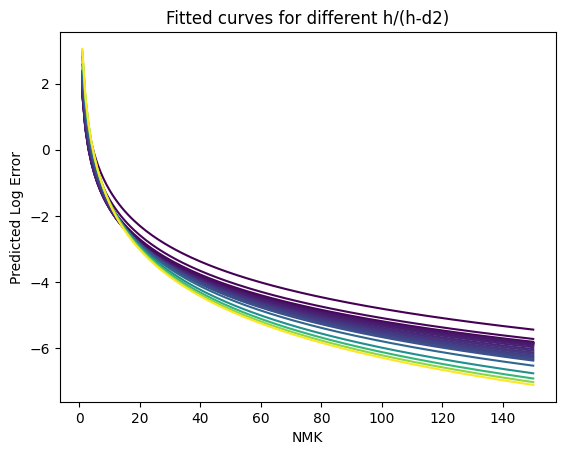

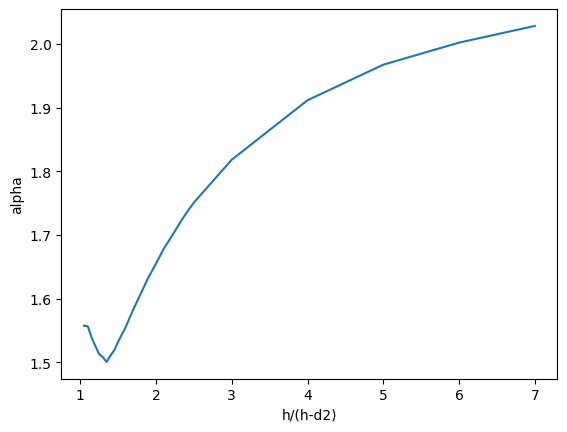

fitted slope: 0.1, slope/avg: 0.0604


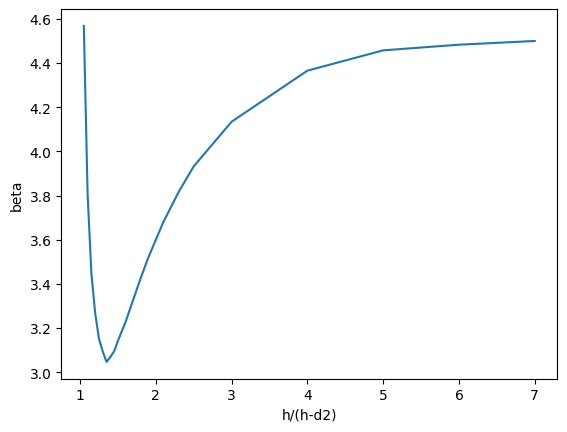

fitted slope: 0.237, slope/avg: 0.0646
Average covariance matrix:
 [[0.00045812 0.0027051 ]
 [0.0027051  0.01796833]]


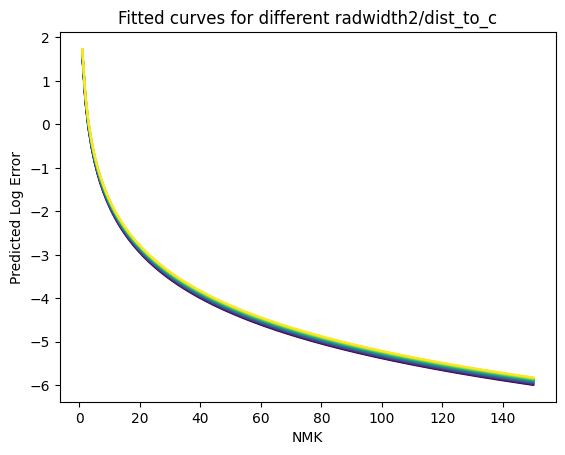

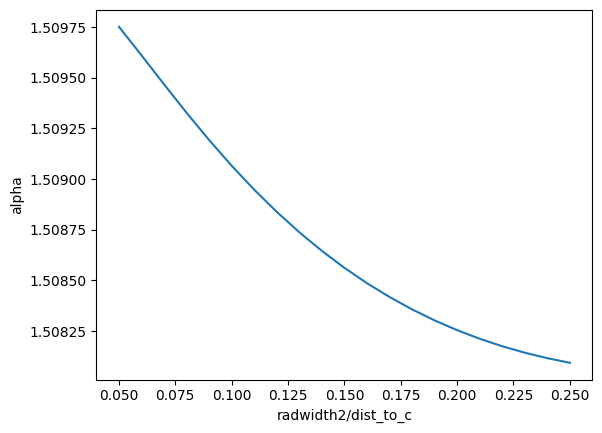

fitted slope: -0.00824, slope/avg: -0.00546


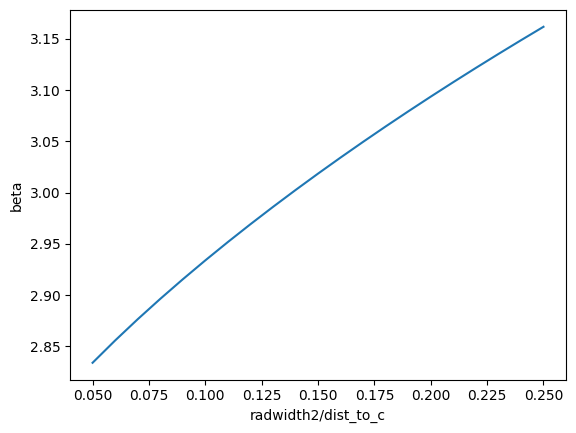

fitted slope: 1.62, slope/avg: 0.538
Average covariance matrix:
 [[1.65133977e-05 9.65244567e-05]
 [9.65244567e-05 6.22753451e-04]]


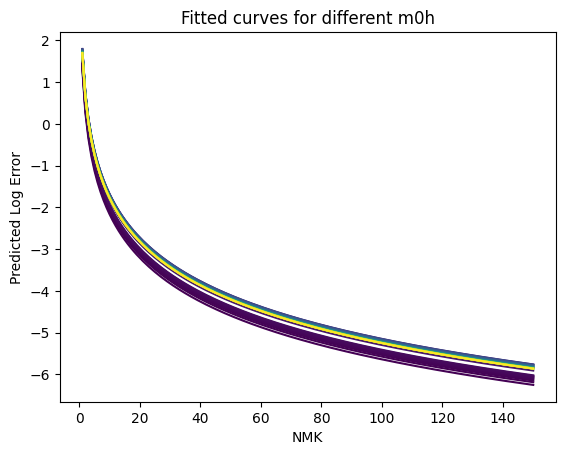

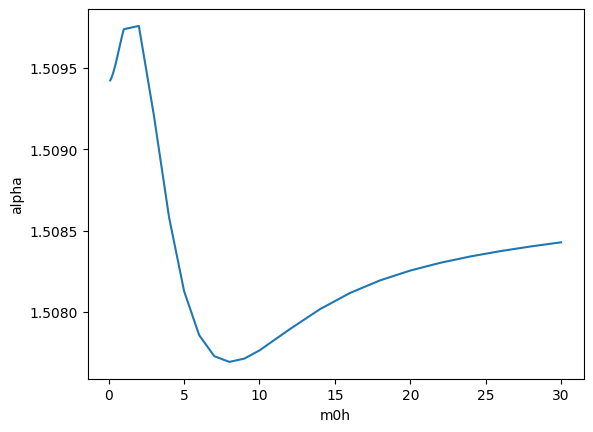

fitted slope: -4.69e-05, slope/avg: -3.11e-05


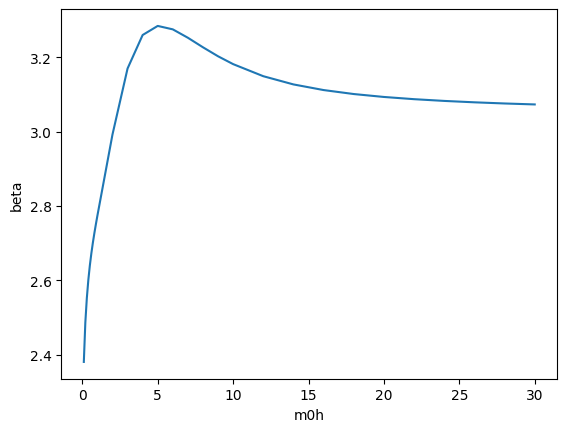

fitted slope: 0.0144, slope/avg: 0.00484
Average covariance matrix:
 [[1.62360387e-05 9.39190452e-05]
 [9.39190452e-05 6.01391683e-04]]


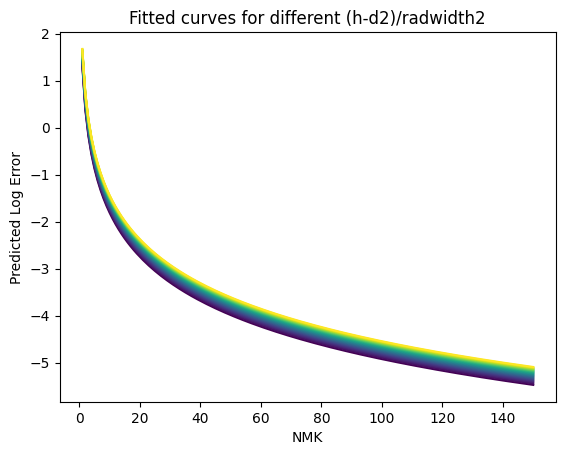

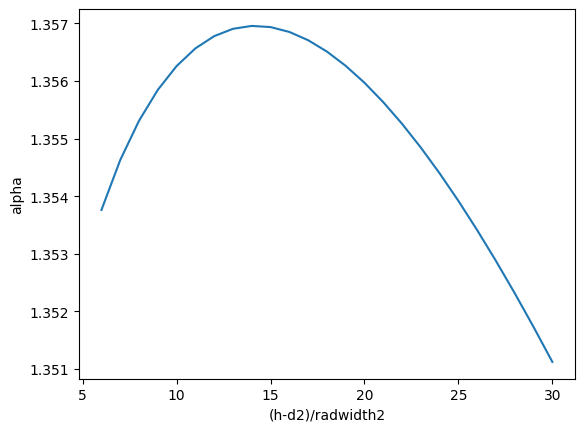

fitted slope: -0.000153, slope/avg: -0.000113


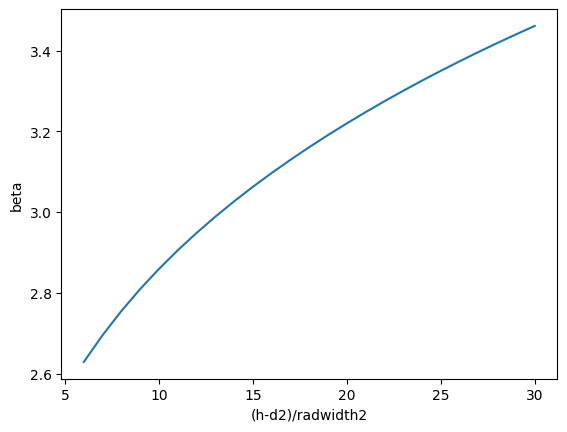

fitted slope: 0.0331, slope/avg: 0.0106
Average covariance matrix:
 [[0.00022982 0.00154428]
 [0.00154428 0.01151749]]


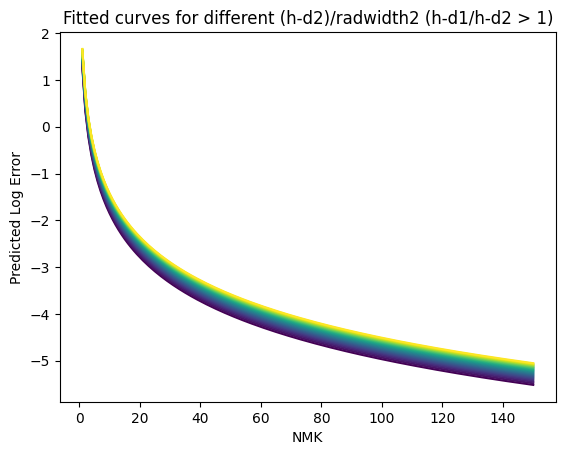

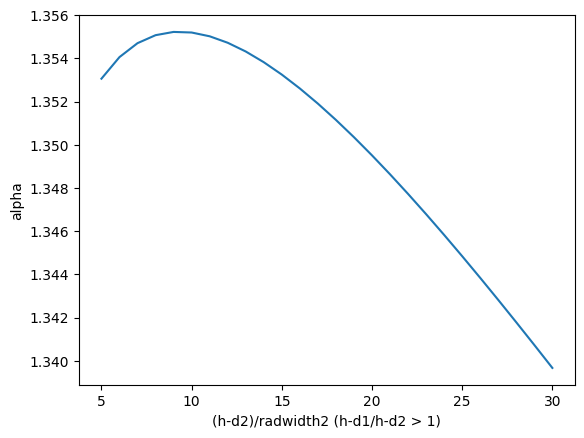

fitted slope: -0.000623, slope/avg: -0.000462


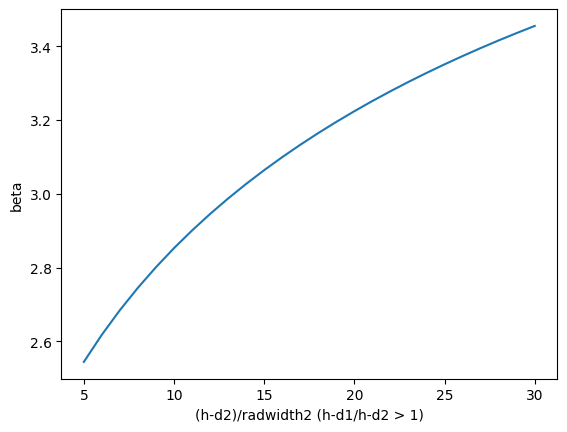

fitted slope: 0.0346, slope/avg: 0.0112
Average covariance matrix:
 [[0.00023537 0.00158365]
 [0.00158365 0.01183259]]


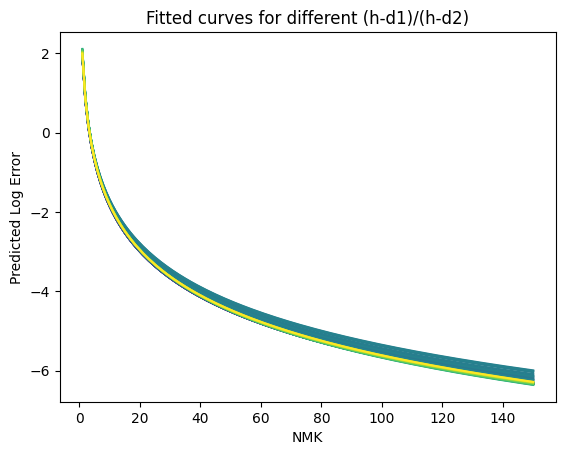

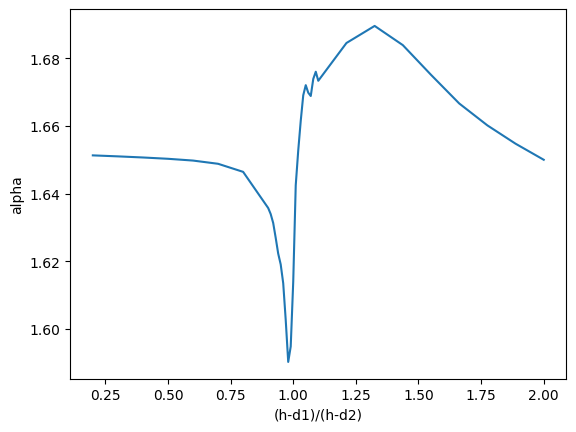

fitted slope: 0.0177, slope/avg: 0.0107


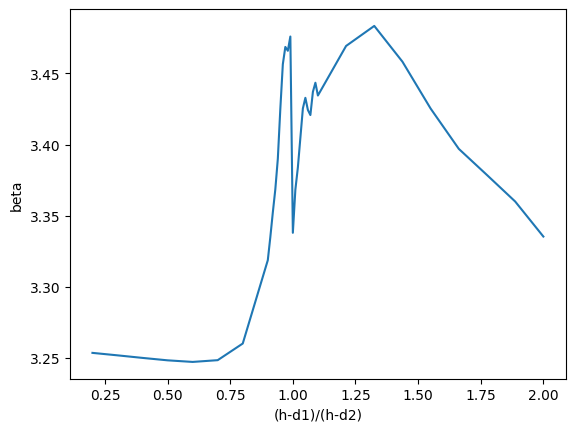

fitted slope: 0.0979, slope/avg: 0.029
Average covariance matrix:
 [[0.00135446 0.00781221]
 [0.00781221 0.05012466]]


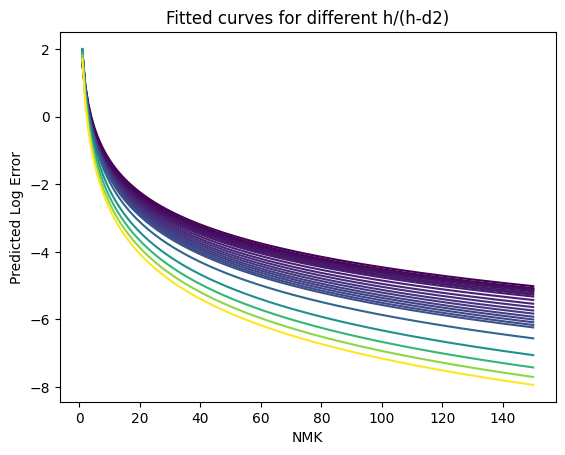

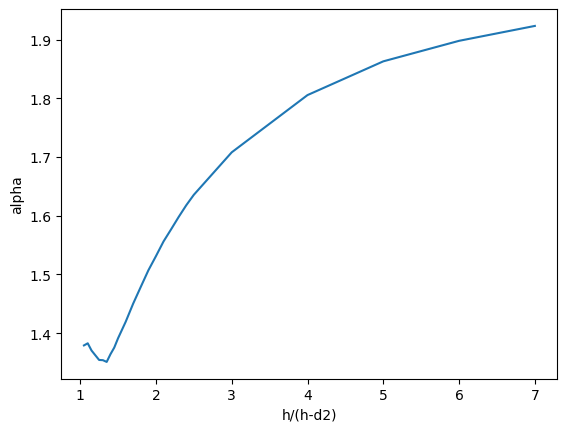

fitted slope: 0.112, slope/avg: 0.073


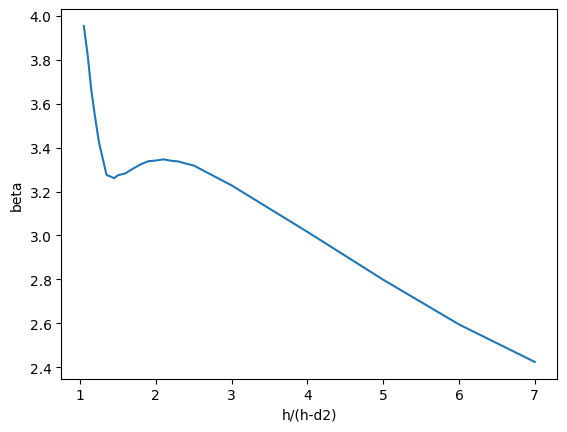

fitted slope: -0.185, slope/avg: -0.0562
Average covariance matrix:
 [[0.00071779 0.0042109 ]
 [0.0042109  0.028093  ]]


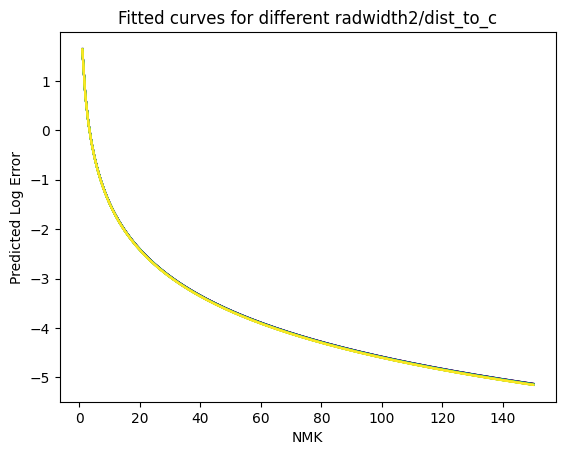

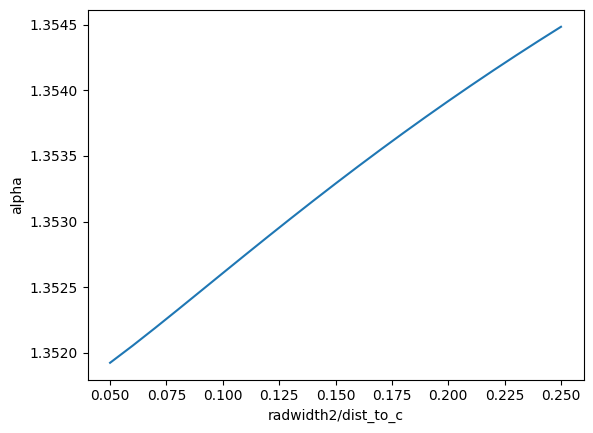

fitted slope: 0.013, slope/avg: 0.00957


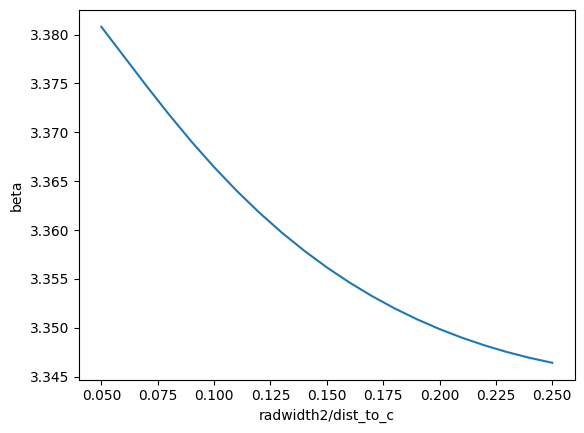

fitted slope: -0.17, slope/avg: -0.0505
Average covariance matrix:
 [[0.00026642 0.0018661 ]
 [0.0018661  0.01452636]]


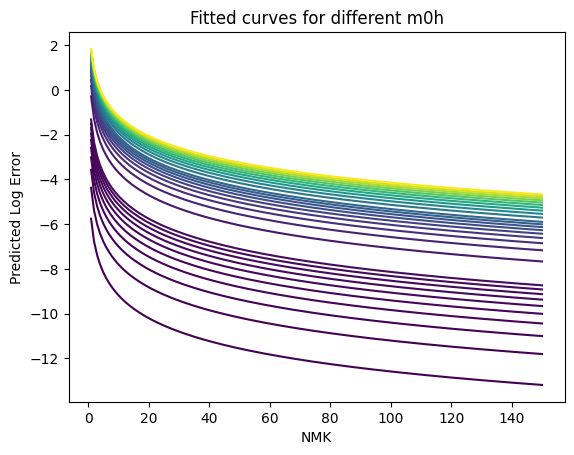

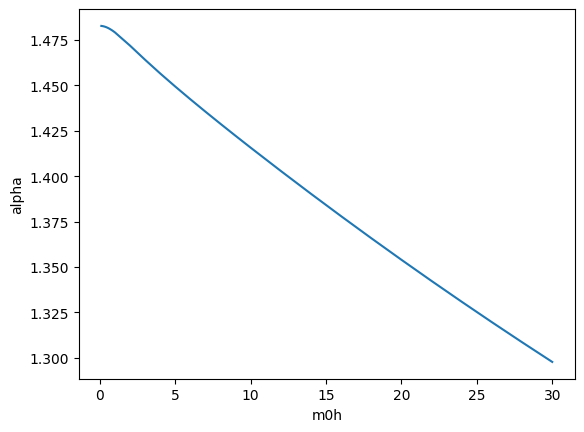

fitted slope: -0.00637, slope/avg: -0.00448


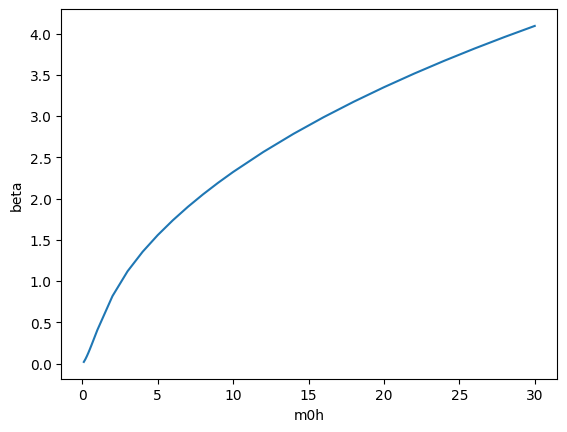

fitted slope: 0.141, slope/avg: 0.0799
Average covariance matrix:
 [[0.00012383 0.00079172]
 [0.00079172 0.00615133]]


In [4]:
fs = {"(h-d2)/radwidth2" : lambda cf, m0 : (cf["h"] - cf["d"][2])/(cf["a"][2] - cf["a"][1]),
      "(h-d1)/(h-d2)" : lambda cf, m0 : (cf["h"] - cf["d"][1])/(cf["h"] - cf["d"][2]),
      "h/(h-d2)" : lambda cf, m0 : cf["h"]/(cf["h"] - cf["d"][2]),
      "radwidth2/dist_to_c" : lambda cf, m0 : (cf["a"][2] - cf["a"][1])/cf["a"][1],
      "m0h" : lambda cf, m0 : cf["h"] * m0}

dimensionless_quantities = {"(h-d2)/radwidth2" : [all_prob_sets[1], fs["(h-d2)/radwidth2"]],
                            "(h-d2)/radwidth2 (h-d1/h-d2 > 1)" : [all_prob_sets[2], fs["(h-d2)/radwidth2"]],
                            "(h-d1)/(h-d2)" : [all_prob_sets[3], fs["(h-d1)/(h-d2)"]],
                            "h/(h-d2)" : [all_prob_sets[4], fs["h/(h-d2)"]],
                            "radwidth2/dist_to_c" : [all_prob_sets[5], fs["radwidth2/dist_to_c"]],
                            "m0h" : [all_prob_sets[6], fs["m0h"]]}

am_r2s = []
dp_r2s = []

for key in dimensionless_quantities.keys():
  info = dimensionless_quantities[key]
  pack = multi_fit_parameters(info[0], info[1], "am", sort_label = key,
                            local_maxima = False, plot_comparison = False,
                            print_params = False, plot_multi_log_comparison = True, plot_multi_params = True,
                            nmk_max = 150, linear_model = False, r2_lin = False)
  am_r2s.append([pack[4], pack[5]])
  avg_pcov = np.mean(pack[3], axis=0)
  print("Average covariance matrix:\n", avg_pcov)

for key in dimensionless_quantities.keys():
  info = dimensionless_quantities[key]
  pack = multi_fit_parameters(info[0], info[1], "dp", sort_label = key,
                            local_maxima = False, plot_comparison = False,
                            print_params = False, plot_multi_log_comparison = True, plot_multi_params = True,
                            nmk_max = 150, linear_model = False, r2_lin = False)
  dp_r2s.append([pack[4], pack[5]])
  avg_pcov = np.mean(pack[3], axis=0)
  print("Average covariance matrix:\n", avg_pcov)

In [5]:
key_lst = list(dimensionless_quantities.keys())
print("ams")
for i in range(len(key_lst)):
  print(key_lst[i])
  print(f"{min(am_r2s[i][0]):.3g}")
  print(f"{min(am_r2s[i][1]):.3g}")
print("dps")
for i in range(len(key_lst)):
  print(key_lst[i])
  print(f"{min(dp_r2s[i][0]):.3g}")
  print(f"{min(dp_r2s[i][1]):.3g}")

ams
(h-d2)/radwidth2
0.995
0.995
(h-d2)/radwidth2 (h-d1/h-d2 > 1)
0.998
0.998
(h-d1)/(h-d2)
0.942
0.97
h/(h-d2)
0.959
0.974
radwidth2/dist_to_c
0.999
0.998
m0h
0.999
0.998
dps
(h-d2)/radwidth2
0.977
0.949
(h-d2)/radwidth2 (h-d1/h-d2 > 1)
0.976
0.952
(h-d1)/(h-d2)
0.92
0.93
h/(h-d2)
0.939
0.912
radwidth2/dist_to_c
0.979
0.952
m0h
0.968
0.937


(h-d2)/radwidth2


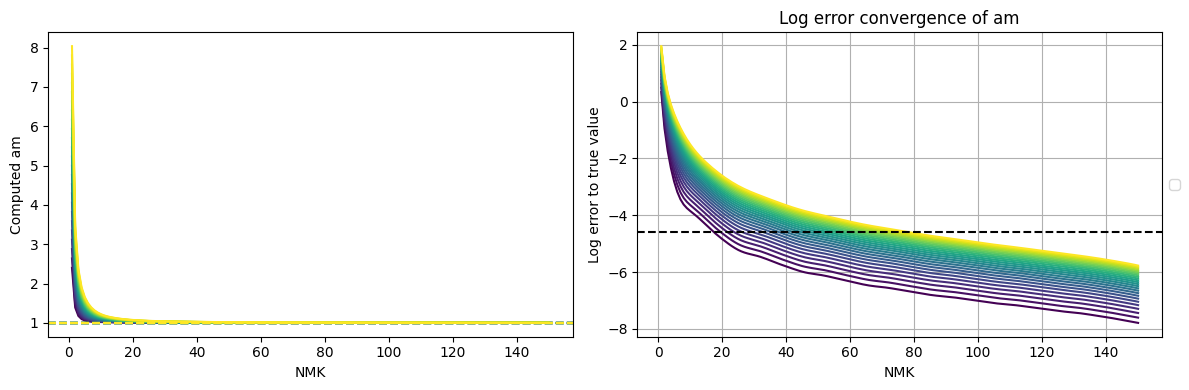

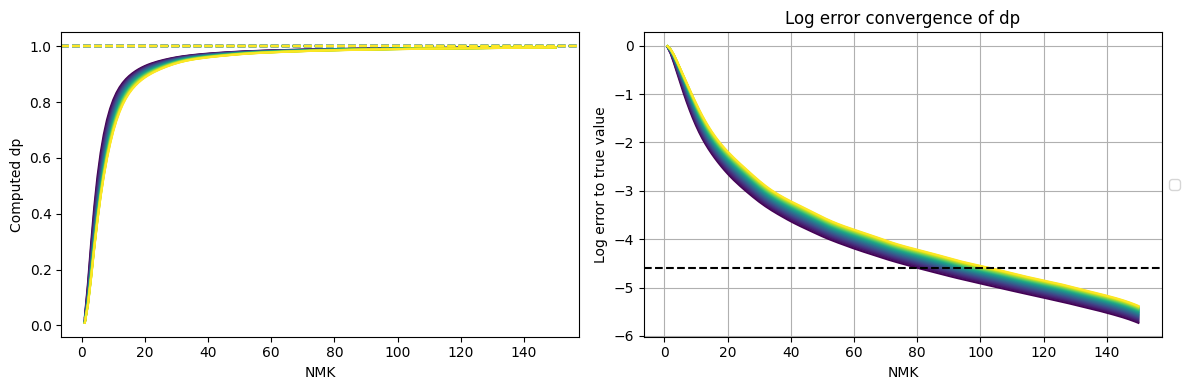

(h-d2)/radwidth2 (h-d1/h-d2 > 1)


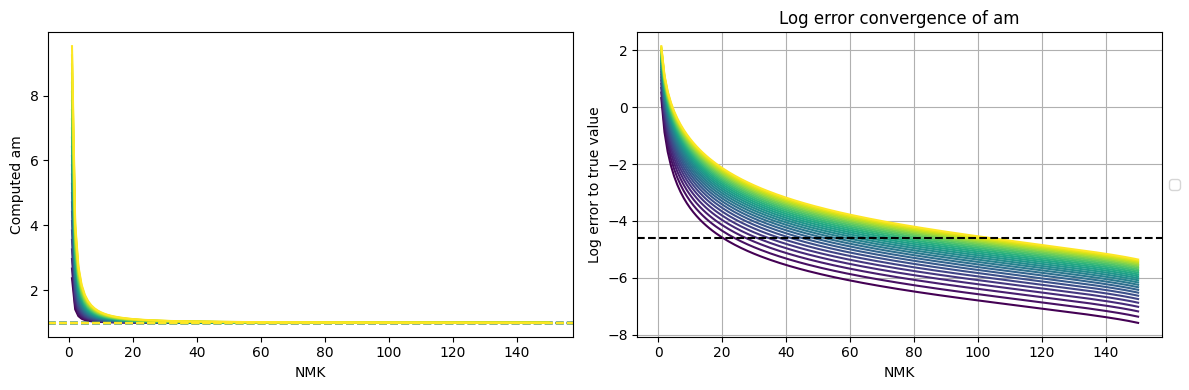

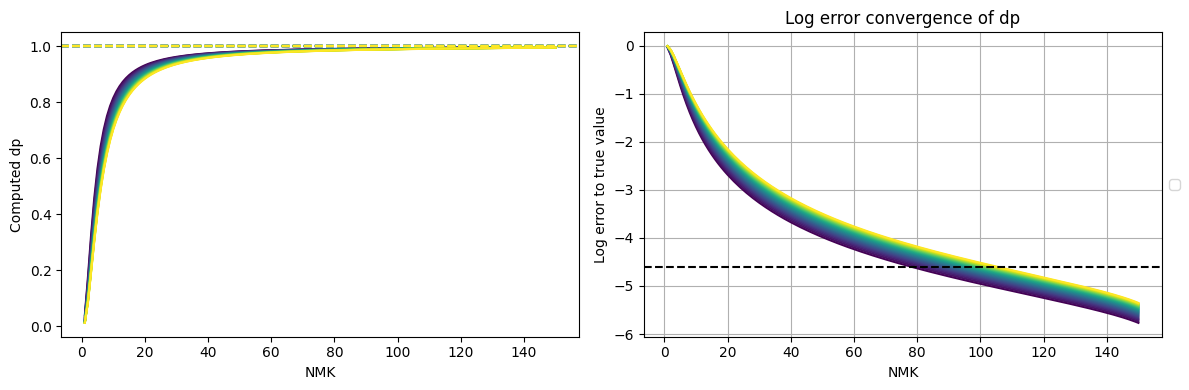

(h-d1)/(h-d2)


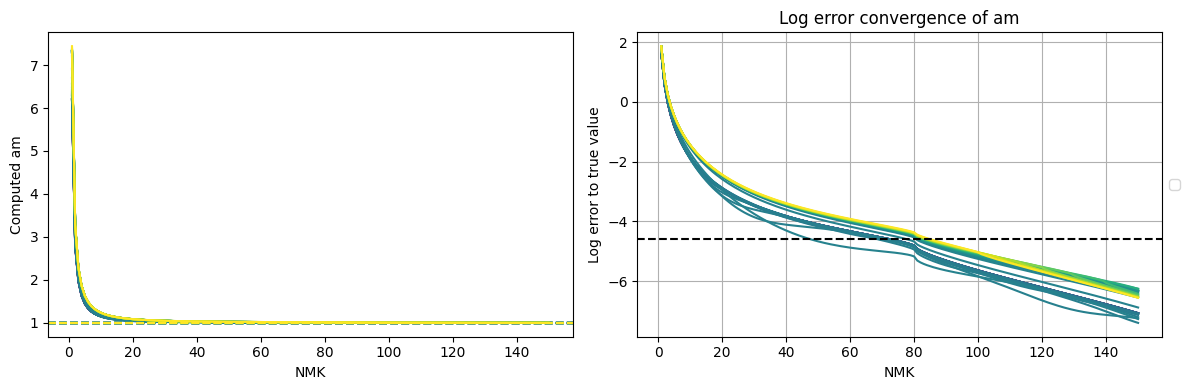

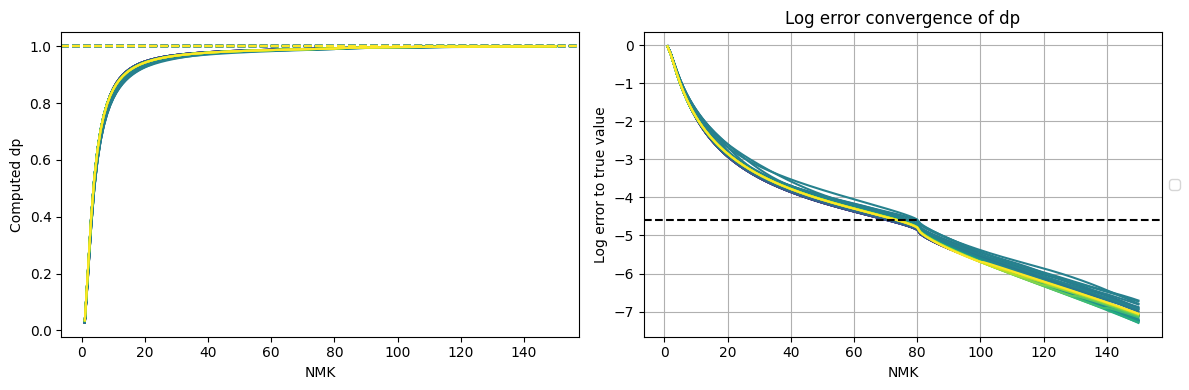

h/(h-d2)


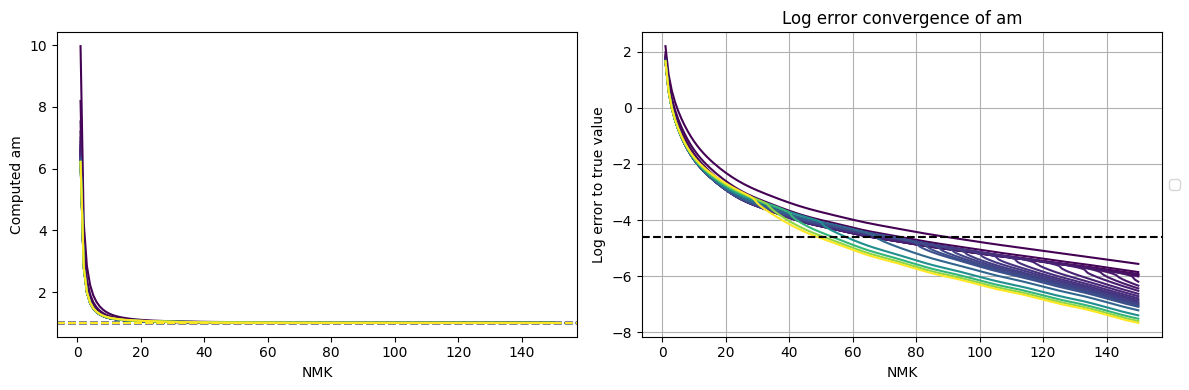

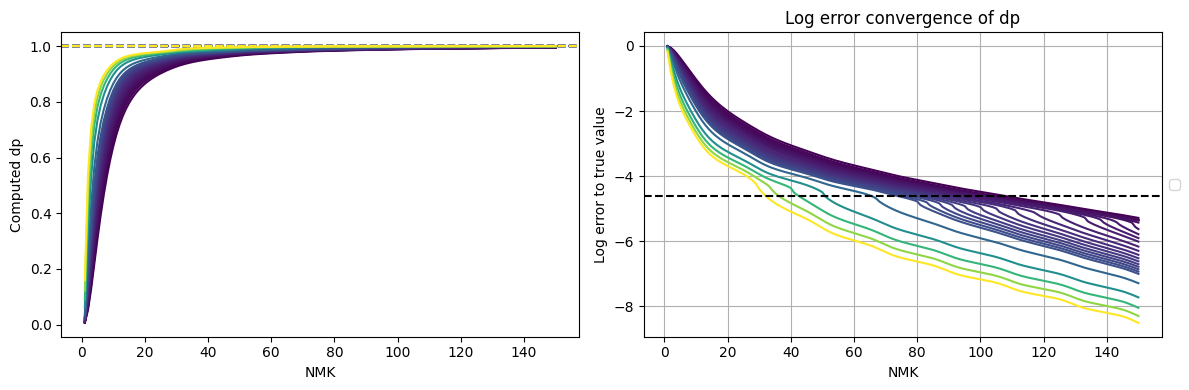

radwidth2/dist_to_c


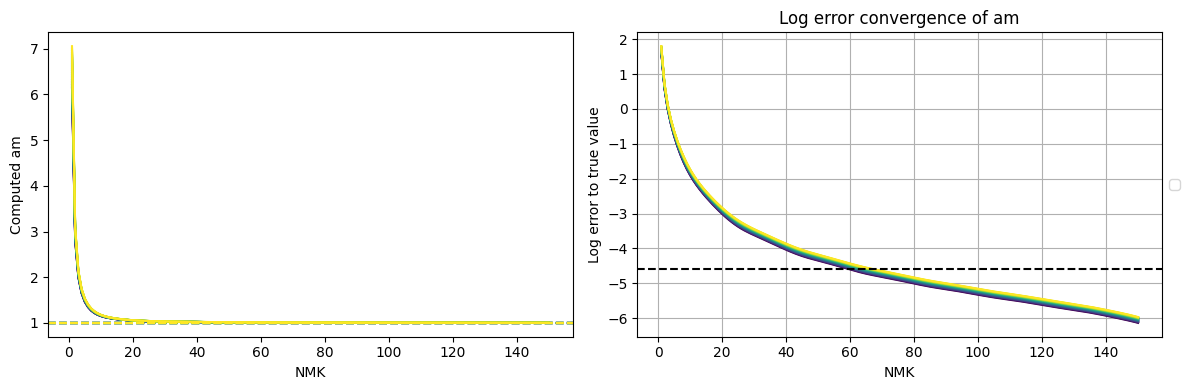

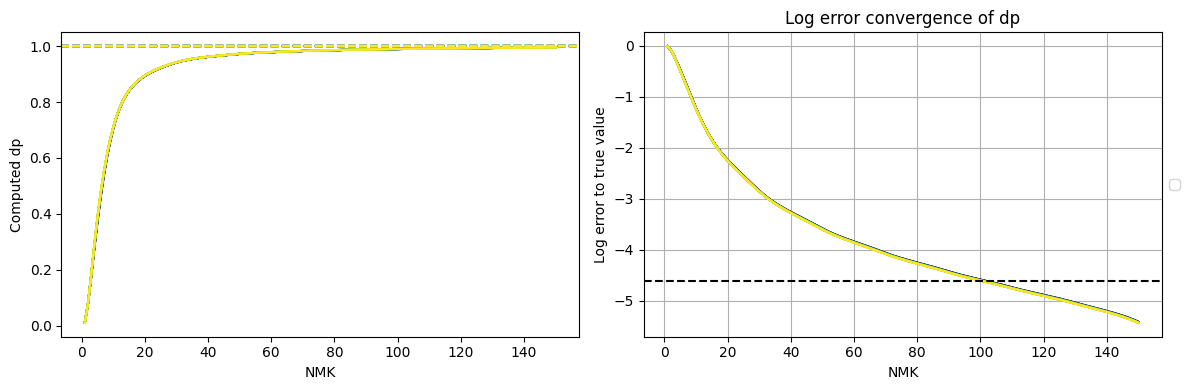

m0h


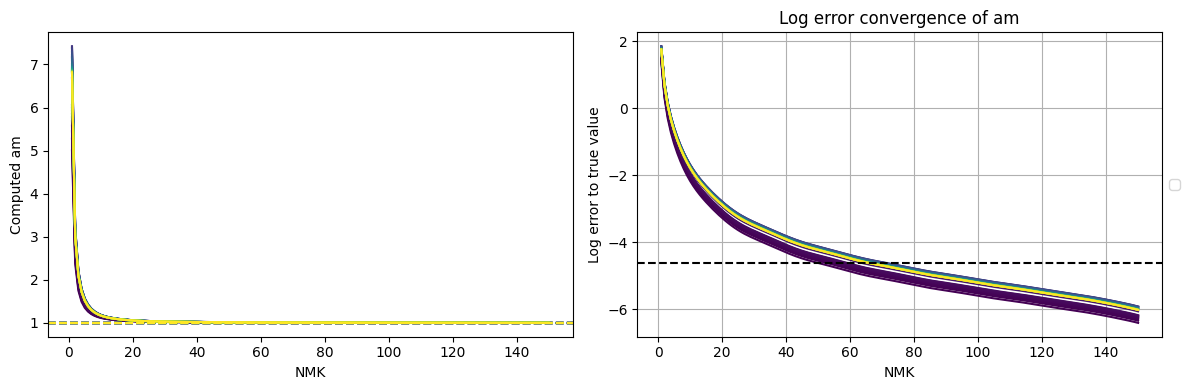

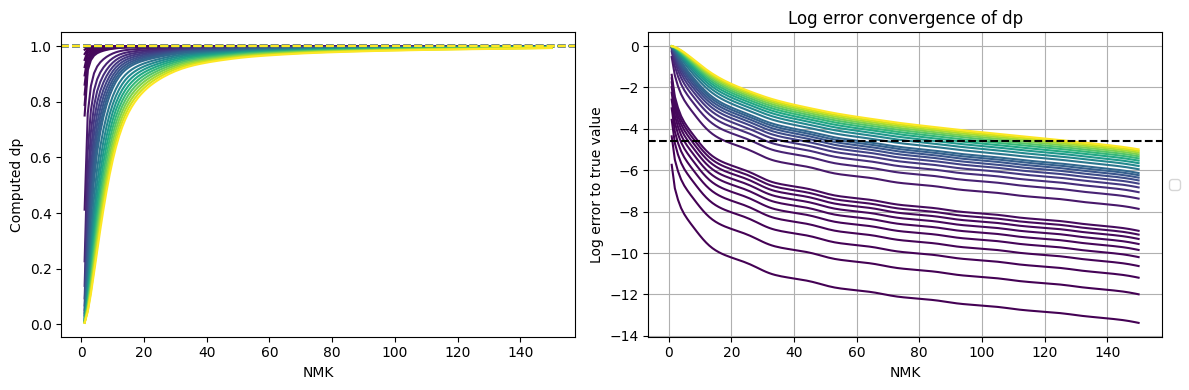

In [23]:
for key in dimensionless_quantities.keys():
  print(key)
  info = dimensionless_quantities[key]
  data = many_data_dicts_to_convergence_plot_data(info[0], all_m0s = True)
  colors = color_by_f_value(info[1], info[0], all_m0s = True)
  plot_set_convergence_and_log(data, "am", colors = colors, scale = True, alpha = 1,
                              label_func = (lambda data_dict, m0 : None), error = 0.01,
                              nmk_max = 150, show_error = True, trunc = 0, smooth = False)
  plot_set_convergence_and_log(data, "dp", colors = colors, scale = True, alpha = 1,
                              label_func = (lambda data_dict, m0 : None), error = 0.01,
                              nmk_max = 150, show_error = True, trunc = 0, smooth = False)